<a href="https://colab.research.google.com/github/mwangcy/BA820/blob/main/Project_BA820/Project_BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BA820 Project Sentiment analysis


# EDA and Cleaning

We import the necessary packages for the data cleaning.

In [1]:
!pip install opendatasets
#!pip install nltk

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning")

Skipping, found downloaded files in "./cnn-articles-after-basic-cleaning" (use force=True to force download)


In [4]:
import pandas as pd

df = pd.read_csv("/content/cnn-articles-after-basic-cleaning/CNN_Articels_clean_2/CNN_Articels_clean.csv")
df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


We drop the column that will not be used for the data modeling.


In [5]:
df.drop(["Index", "Url"], axis = 1, inplace = True)

We find the rows with missing values.

In [6]:
df[df.isna().any(axis=1)].head(10)

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
11591,By,2012-01-17 11:27:16,news,europe,Underwater scenes of the Costa Concordia wreck...,The Italian Coast Guard has released photos of...,"europe, Underwater scenes of the Costa Concord...",Underwater scenes of the Costa Concordia wreckage,NaN
18989,"Monica Sarkar, CNN",2015-05-05 11:44:49,news,europe,Outsiders welcome? UK migrants share their sto...,Immigration has been one of the most hotly-con...,"europe, Outsiders welcome? UK migrants share t...",Outsiders welcome? UK migrants share their sto...,NaN
19171,"Nic Robertson, CNN",2015-06-05 16:39:28,news,europe,Sarajevo: Then and Now - CNN,"During the Bosnian War, CNN's Nic Robertson do...","europe, Sarajevo: Then and Now - CNN",Sarajevo: Then and Now,NaN
24462,"James Masters and Tamara Qiblawi, CNN",2017-08-17 15:46:53,news,europe,Terror attacks in Spain: Live updates - CNN,A van plowed into a crowd of people in the pop...,"europe, Terror attacks in Spain: Live updates ...",Terror attacks in Spain: Live updates,NaN
24583,"Lauren Said-Moorhouse and Judith Vonberg, CNN",2017-09-24 16:27:35,news,europe,Germany results 2017: Live updates - CNN,Exit polls in Germany suggest voters have give...,"europe, Germany results 2017: Live updates - CNN",Germany results 2017: Live updates,NaN
24621,"Nick Thompson and Eliza Mackintosh, CNN",2017-09-15 09:41:41,news,europe,London Underground train blast: Live updates -...,An improvised explosive device was detonated o...,"europe, London Underground train blast: Live u...",London Underground train blast: Live updates,NaN
24791,"Eliza Mackintosh and Bryony Jones, CNN",2017-10-10 15:47:29,news,europe,Catalan independence speech: Live updates - CNN,"Catalonia's President, Carles Puigdemont, has ...","europe, Catalan independence speech: Live upda...",Catalan independence speech: Live updates,NaN
25430,"Matias Grez and Lauren Said-Moorhouse, CNN",2018-02-09 10:01:08,sport,sport,Olympics opening ceremony: Live updates - CNN,"The 2018 Winter Olympics open in PyeongChang, ...","sport, Olympics opening ceremony: Live updates...",Olympics opening ceremony: Live updates,NaN
25594,"Blathnaid Healy, James Masters and Eliza Macki...",2018-03-18 17:14:22,news,europe,Live updates: Russian election 2018 - CNN,Russia's presidential election is widely expec...,"europe, Live updates: Russian election 2018 - CNN",Live updates: Russian election 2018,NaN


We clean the Author column since it contains errors and typos.





In [7]:
df[df["Author"].str.match("By $")].head()

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
3096,By,2012-08-09 16:20:03,news,world,Sponsorships policy - CNN,Parts of CNN's coverage beyond the daily news ...,"world, Sponsorships policy - CNN",Sponsorships policy,Parts of CNN's coverage beyond the daily news ...
4001,By,2012-11-15 07:40:14,news,asia,Xi Jinping's first public address - CNN,"Ladies, gentlemen and friends, hello. (We) hav...","asia, Xi Jinping's first public address - CNN",Xi Jinping's first public address,Story highlightsChinese Communist Party faces ...
4211,By,2014-02-22 21:18:46,news,worldsport,Sochi 2014: More woes for U.S. hockey but joy ...,It's been a tough last few days for U.S. hocke...,"worldsport, Sochi 2014: More woes for U.S. hoc...",Sochi 2014: More woes for U.S. hockey but joy ...,Story highlightsThe U.S. loses to Finland 5-0 ...
5098,By,2012-01-05 20:44:31,news,living,How to nominate a CNN Hero - CNN,"They're your neighbors, your friends, your col...","living, How to nominate a CNN Hero - CNN",How to nominate a CNN Hero,Story highlightsMost CNN Heroes are selected a...
10470,By,2011-08-24 17:54:07,sport,motorsport,Senna to replace Heidfeld in Belgium - CNN,Brazilian driver Bruno Senna will replace Nick...,"motorsport, Senna to replace Heidfeld in Belgi...",Senna to replace Heidfeld in Belgium,Story highlightsBruno Senna will replace Nick ...


In [8]:
mapping = {'By $' : "Anonymous"}
df["Author"] = df["Author"].replace(mapping, regex=True)

In [9]:
df[df["Author"].str.match("Anonymous")].head()

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
3096,Anonymous,2012-08-09 16:20:03,news,world,Sponsorships policy - CNN,Parts of CNN's coverage beyond the daily news ...,"world, Sponsorships policy - CNN",Sponsorships policy,Parts of CNN's coverage beyond the daily news ...
4001,Anonymous,2012-11-15 07:40:14,news,asia,Xi Jinping's first public address - CNN,"Ladies, gentlemen and friends, hello. (We) hav...","asia, Xi Jinping's first public address - CNN",Xi Jinping's first public address,Story highlightsChinese Communist Party faces ...
4211,Anonymous,2014-02-22 21:18:46,news,worldsport,Sochi 2014: More woes for U.S. hockey but joy ...,It's been a tough last few days for U.S. hocke...,"worldsport, Sochi 2014: More woes for U.S. hoc...",Sochi 2014: More woes for U.S. hockey but joy ...,Story highlightsThe U.S. loses to Finland 5-0 ...
5098,Anonymous,2012-01-05 20:44:31,news,living,How to nominate a CNN Hero - CNN,"They're your neighbors, your friends, your col...","living, How to nominate a CNN Hero - CNN",How to nominate a CNN Hero,Story highlightsMost CNN Heroes are selected a...
10470,Anonymous,2011-08-24 17:54:07,sport,motorsport,Senna to replace Heidfeld in Belgium - CNN,Brazilian driver Bruno Senna will replace Nick...,"motorsport, Senna to replace Heidfeld in Belgi...",Senna to replace Heidfeld in Belgium,Story highlightsBruno Senna will replace Nick ...


In [10]:
df.head()

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,Kathryn Vasel,2022-03-18 14:37:21,business,success,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           37949 non-null  object
 1   Date published   37949 non-null  object
 2   Category         37949 non-null  object
 3   Section          37949 non-null  object
 4   Headline         37949 non-null  object
 5   Description      37949 non-null  object
 6   Keywords         37949 non-null  object
 7   Second headline  37949 non-null  object
 8   Article text     37940 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [12]:
df.describe()

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
count,37949,37949,37949,37949,37949,37949,37949,37949,37940
unique,11744,37948,9,55,37857,37829,37863,37881,37918
top,Anonymous,2016-02-17 14:08:53,news,europe,Must-watch videos of the week - CNN,,"app-news-section, Must-watch videos of the wee...",Must-watch videos of the week,\n
freq,3286,2,18077,10635,14,22,14,14,14


In [13]:
df.Author.value_counts().head()

Anonymous                3286
Matias Grez, CNN          686
Ben Morse, CNN            584
By the CNN Wire Staff     575
George Ramsay, CNN        562
Name: Author, dtype: int64

In [14]:
df[df["Author"] == " "].head()

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
17190,,2014-04-18 14:10:18,sport,motorsport,Ferrari back on form in Shanghai practice - CNN,It's been another difficult start to the seaso...,"chinese grand prix, grand prix china, ferrari,...",Ferrari back on form in Shanghai practice,Story highlightsFernando Alonso posts second f...
17461,,2014-06-20 13:28:13,sport,golf,U.S. Women's Open: 11-year-old Lucy Li misses ...,"She's got nerves of steel, golf talent beyond ...","lucy li, youngest us open, us womens open, Sta...",U.S. Women's Open: 11-year-old Lucy Li misses cut,"Story highlightsLucy Li, 11, becomes the young..."
17961,,2014-10-11 19:17:09,sport,tennis,Federer beats Djokovic to reach Shanghai final...,Roger Federer produced an imperious performanc...,"federer shanghai, federer djokovic, shanghai m...",Roger Federer eases Novak Djokovic aside to re...,Story highlightsRoger Federer defeats Novak Dj...
17998,,2014-11-29 19:54:39,sport,football,Football: Chelsea draw blank for first time in...,Chelsea maintained its unbeaten start to the E...,"football, Football: Chelsea draw blank for fir...",Football: High-flying Chelsea held by Sunderla...,Story highlightsChelsea held away to Sunderlan...
17999,,2014-11-29 22:10:33,sport,football,Unstoppable Real Madrid register record winnin...,Karim Benzema and Gareth Bale strike for Real ...,"football, Unstoppable Real Madrid register rec...",Unstoppable Real Madrid register club-record 1...,Story highlightsReal Madrid set new club recor...


In [15]:
mapping_2 = {"^\s*$" : "Anonymous"}
df["Author"] = df["Author"].replace(mapping_2, regex=True)

In [16]:
df.Author.sort_values().head()

19287                         Amanda Davies and Chris Borg
32921     Angela Dewan, Luke McGee and Richard Allen Gr...
23118       Basma Atassi, Greg Botelho and Gul Tuysuz, CNN
22404               By Amanda Davies and Rob Hodgetts, CNN
33890                                   By Luke McGee, CNN
Name: Author, dtype: object

In [17]:
df.isna().sum()

Author             0
Date published     0
Category           0
Section            0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       9
dtype: int64

We drop the rows with missing values from the dataset.






In [18]:
df.dropna(inplace = True)

In [19]:
df

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,Kathryn Vasel,2022-03-18 14:37:21,business,success,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...
...,...,...,...,...,...,...,...,...,...
37944,"Ben Church and Aleks Klosok, CNN",2022-03-01 10:59:10,sport,sport,Russian President Vladimir Putin is being stri...,Russian President Vladimir Putin has been stri...,"sport, Russian President Vladimir Putin is bei...",Vladimir Putin is being stripped of his honora...,(CNN)Russian President Vladimir Putin has bee...
37945,"Tamara Qiblawi, CNN",2022-03-01 12:55:37,news,europe,"On NATO's doorstep, a former tourist hotspot i...",A long line of men snakes out of an unassuming...,"europe, On NATO's doorstep, a former tourist h...","On NATO's doorstep, a former tourist hotspot i...","Lviv, Ukraine (CNN)A long line of men snakes o..."
37946,"Wayne Sterling and Steve Almasy, CNN",2022-03-01 11:54:44,sport,sport,MLB is postponing Opening Day after owners and...,Major League Baseball (MLB) is postponing its ...,"sport, MLB is postponing Opening Day after own...",MLB is postponing Opening Day after owners and...,(CNN)Major League Baseball (MLB) is postponin...
37947,CNN Editorial Research,2013-01-12 01:42:49,news,europe,Mikhail Gorbachev Fast Facts - CNN,"Read CNN's Fast Facts on Mikhail Gorbachev, fo...","europe, Mikhail Gorbachev Fast Facts - CNN",Mikhail Gorbachev Fast Facts,Here's a look at the life of Mikhail Gorbachev...


In [20]:
df.Category.value_counts()

news             18069
sport            15541
politics          2461
business           854
health             557
entertainment      413
travel              39
vr                   5
style                1
Name: Category, dtype: int64

In [21]:
df.Section.value_counts().head()

europe      10627
sport        5638
football     4911
politics     2461
us           2119
Name: Section, dtype: int64

## Sampling

Since the text article contains a lot of words, in order to make it run faster, we will only sample a fraction of the data for now.

In [22]:
df = df.sample(frac=0.01, random_state = 327)

## Pre-Processing

We lowercase all the strings and remove all leading and trailing spaces.






In [23]:
columns = list(df.columns)
columns = [column for column in columns if column not in ["Author", "Date published"]]
columns

for column in columns:
  df[column] = df[column].str.lower()
  df[column] = df[column].str.strip()

df

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
8850,"John Newsome and Ralph Ellis, CNN",2016-12-27 02:13:07,news,us,former texas rangers pitcher john barfield sho...,former texas rangers pitcher john barfield was...,"us, former texas rangers pitcher john barfield...",former texas rangers pitcher john barfield sho...,story highlightsthe domestic incident occurred...
4731,"Laura Smith-Spark, CNN",2018-01-05 12:49:23,news,middleeast,un experts urge iran to respect protesters' ri...,un human rights experts urged iranian authorit...,"middleeast, un experts urge iran to respect pr...",un experts urge iran to respect rights of prot...,(cnn)un human rights experts urged iranian aut...
25132,"Dakin Andone and Vasco Cotovio, CNN",2017-12-01 21:46:43,news,europe,prosecutor: bosnian croat war criminal had cya...,the bosnian croat war criminal who died wednes...,"europe, prosecutor: bosnian croat war criminal...",prosecutor: bosnian croat war criminal died of...,"story highlightsslobodan praljak, a former cro..."
18330,"Frederik Pleitgen, Steve Almasy and Alla Eshch...",2015-02-27 22:18:54,news,europe,"boris nemtsov, critic of putin, shot dead - cnn",russian opposition leader boris nemtsov was ki...,"europe, boris nemtsov, critic of putin, shot d...","boris nemtsov, outspoken putin critic, shot de...",story highlights a mourning march will be held...
13314,Anonymous,2012-07-03 17:15:24,sport,tennis,murray ends marathon match to seal wimbledon l...,andy murray recorded a double triumph on tuesd...,"tennis, murray ends marathon match to seal wim...",murray ends marathon match to seal wimbledon l...,story highlightsbritain's andy murray books wi...
...,...,...,...,...,...,...,...,...,...
15305,By CNN Staff,2013-05-17 16:05:37,news,europe,france court ruling clears way for gay bill - cnn,french court rules that a bill permitting same...,"europe, france court ruling clears way for gay...",france court ruling clears way for gay bill,story highlightshollande is expected to sign t...
34688,"Luke McGee and James Frater, CNN",2021-03-24 12:12:37,news,uk,boris johnson's latest gaffe could threaten br...,"boris johnson, the uk's gaffe-prone prime mini...","uk, boris johnson's latest gaffe could threate...",boris johnson's latest gaffe could threaten br...,"london (cnn)boris johnson, the uk's gaffe-pron..."
33080,"Ravi Ubha, for CNN",2020-08-28 11:11:52,sport,sport,nfl's baltimore ravens call for arrest of poli...,while several sporting events were scrapped in...,"sport, nfl's baltimore ravens call for arrest ...",nfl's baltimore ravens call for arrest of poli...,(cnn)while several sporting events were scrapp...
31250,"Ravi Ubha and Amanda Davies, CNN",2019-12-20 09:47:02,sport,football,megan rapinoe's epic 2019 - cnn,megan rapinoe's 2019 was much more than just p...,"football, megan rapinoe's epic 2019 - cnn",annus mirabilis: megan rapinoe's epic 2019,(cnn)megan rapinoe's 2019 was much more than j...


We change the "Data published" column to a datetime datatype.






In [24]:
df["Date published"] = pd.to_datetime(df["Date published"]).dt.strftime('%Y/%m/%d')
df

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
8850,"John Newsome and Ralph Ellis, CNN",2016/12/27,news,us,former texas rangers pitcher john barfield sho...,former texas rangers pitcher john barfield was...,"us, former texas rangers pitcher john barfield...",former texas rangers pitcher john barfield sho...,story highlightsthe domestic incident occurred...
4731,"Laura Smith-Spark, CNN",2018/01/05,news,middleeast,un experts urge iran to respect protesters' ri...,un human rights experts urged iranian authorit...,"middleeast, un experts urge iran to respect pr...",un experts urge iran to respect rights of prot...,(cnn)un human rights experts urged iranian aut...
25132,"Dakin Andone and Vasco Cotovio, CNN",2017/12/01,news,europe,prosecutor: bosnian croat war criminal had cya...,the bosnian croat war criminal who died wednes...,"europe, prosecutor: bosnian croat war criminal...",prosecutor: bosnian croat war criminal died of...,"story highlightsslobodan praljak, a former cro..."
18330,"Frederik Pleitgen, Steve Almasy and Alla Eshch...",2015/02/27,news,europe,"boris nemtsov, critic of putin, shot dead - cnn",russian opposition leader boris nemtsov was ki...,"europe, boris nemtsov, critic of putin, shot d...","boris nemtsov, outspoken putin critic, shot de...",story highlights a mourning march will be held...
13314,Anonymous,2012/07/03,sport,tennis,murray ends marathon match to seal wimbledon l...,andy murray recorded a double triumph on tuesd...,"tennis, murray ends marathon match to seal wim...",murray ends marathon match to seal wimbledon l...,story highlightsbritain's andy murray books wi...
...,...,...,...,...,...,...,...,...,...
15305,By CNN Staff,2013/05/17,news,europe,france court ruling clears way for gay bill - cnn,french court rules that a bill permitting same...,"europe, france court ruling clears way for gay...",france court ruling clears way for gay bill,story highlightshollande is expected to sign t...
34688,"Luke McGee and James Frater, CNN",2021/03/24,news,uk,boris johnson's latest gaffe could threaten br...,"boris johnson, the uk's gaffe-prone prime mini...","uk, boris johnson's latest gaffe could threate...",boris johnson's latest gaffe could threaten br...,"london (cnn)boris johnson, the uk's gaffe-pron..."
33080,"Ravi Ubha, for CNN",2020/08/28,sport,sport,nfl's baltimore ravens call for arrest of poli...,while several sporting events were scrapped in...,"sport, nfl's baltimore ravens call for arrest ...",nfl's baltimore ravens call for arrest of poli...,(cnn)while several sporting events were scrapp...
31250,"Ravi Ubha and Amanda Davies, CNN",2019/12/20,sport,football,megan rapinoe's epic 2019 - cnn,megan rapinoe's 2019 was much more than just p...,"football, megan rapinoe's epic 2019 - cnn",annus mirabilis: megan rapinoe's epic 2019,(cnn)megan rapinoe's 2019 was much more than j...


We clean the strings by removing the punctuation, except "!" and "?", since they would be relevant for sentiment analysis. We also remove all double spaces caused by the data cleaning.

In [25]:
import re

for column in columns:
  df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s!?]', '', x))
  df[column] = df[column].apply(lambda x: re.sub(r"\s+", " ", x))

df

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text
8850,"John Newsome and Ralph Ellis, CNN",2016/12/27,news,us,former texas rangers pitcher john barfield sho...,former texas rangers pitcher john barfield was...,us former texas rangers pitcher john barfield ...,former texas rangers pitcher john barfield sho...,story highlightsthe domestic incident occurred...
4731,"Laura Smith-Spark, CNN",2018/01/05,news,middleeast,un experts urge iran to respect protesters rig...,un human rights experts urged iranian authorit...,middleeast un experts urge iran to respect pro...,un experts urge iran to respect rights of prot...,cnnun human rights experts urged iranian autho...
25132,"Dakin Andone and Vasco Cotovio, CNN",2017/12/01,news,europe,prosecutor bosnian croat war criminal had cyan...,the bosnian croat war criminal who died wednes...,europe prosecutor bosnian croat war criminal h...,prosecutor bosnian croat war criminal died of ...,story highlightsslobodan praljak a former croa...
18330,"Frederik Pleitgen, Steve Almasy and Alla Eshch...",2015/02/27,news,europe,boris nemtsov critic of putin shot dead cnn,russian opposition leader boris nemtsov was ki...,europe boris nemtsov critic of putin shot dead...,boris nemtsov outspoken putin critic shot dead...,story highlights a mourning march will be held...
13314,Anonymous,2012/07/03,sport,tennis,murray ends marathon match to seal wimbledon l...,andy murray recorded a double triumph on tuesd...,tennis murray ends marathon match to seal wimb...,murray ends marathon match to seal wimbledon l...,story highlightsbritains andy murray books wim...
...,...,...,...,...,...,...,...,...,...
15305,By CNN Staff,2013/05/17,news,europe,france court ruling clears way for gay bill cnn,french court rules that a bill permitting same...,europe france court ruling clears way for gay ...,france court ruling clears way for gay bill,story highlightshollande is expected to sign t...
34688,"Luke McGee and James Frater, CNN",2021/03/24,news,uk,boris johnsons latest gaffe could threaten bri...,boris johnson the uks gaffeprone prime ministe...,uk boris johnsons latest gaffe could threaten ...,boris johnsons latest gaffe could threaten bri...,london cnnboris johnson the uks gaffeprone pri...
33080,"Ravi Ubha, for CNN",2020/08/28,sport,sport,nfls baltimore ravens call for arrest of polic...,while several sporting events were scrapped in...,sport nfls baltimore ravens call for arrest of...,nfls baltimore ravens call for arrest of polic...,cnnwhile several sporting events were scrapped...
31250,"Ravi Ubha and Amanda Davies, CNN",2019/12/20,sport,football,megan rapinoes epic 2019 cnn,megan rapinoes 2019 was much more than just pl...,football megan rapinoes epic 2019 cnn,annus mirabilis megan rapinoes epic 2019,cnnmegan rapinoes 2019 was much more than just...


We create a new function for tokenization for the BoW and TF-IDF. By using stemming, we can reduce the number of columns and make the comparison between sentences easier.

In [26]:
### Stemming Code
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

english_stop_words = set(stopwords.words("english"))
Stemmer = PorterStemmer()

def stemming_processing(x):
    words = word_tokenize(x)
    stem_words = [Stemmer.stem(word) for word in words if word not in english_stop_words]
    return stem_words

#Headline - Mauro Wang

We perform Bag-of-Words (BoW) and TF-IDF for the Headline column.


## BagOfWords

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv_headline = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))

cv_headline.fit(df["Headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e6961bf0ee0>)

In [28]:
dtm = cv_headline.transform(df["Headline"])
bow_headline = pd.DataFrame(dtm.toarray(), columns=cv_headline.get_feature_names_out())
bow_headline

,1,10,10000,103,114m,12,13,147,15,1500,...,ye,year,young,youth,yume,z,zahir,zealand,zero,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
bow_headline.sum(axis = 0).sort_values(ascending = False)

cnn         361
win          23
cnnpolit     22
say          20
?            19
           ... 
chop          1
larri         1
largest       1
larg          1
kick          1
Length: 1743, dtype: int64

## TF-IDF

In [30]:
tfidf_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))
tfidf_model.fit(df["Headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e695f03feb0>)

In [31]:
tfidf_transformed_headline = tfidf_model.transform(df["Headline"])
tfidf_headline = pd.DataFrame(tfidf_transformed_headline.toarray(), columns = tfidf_model.get_feature_names_out())
tfidf_headline

,1,10,10000,103,114m,12,13,147,15,1500,...,ye,year,young,youth,yume,z,zahir,zealand,zero,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
tfidf_headline.sum(axis = 0).sort_values(ascending = False)

cnn            24.910852
win             5.668128
?               5.221407
cnnpolit        4.909756
say             4.390755
                 ...    
nationalist     0.241827
ive             0.241827
romney          0.241827
gop             0.241827
utah            0.241827
Length: 1743, dtype: float64

## Word Cloud


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.







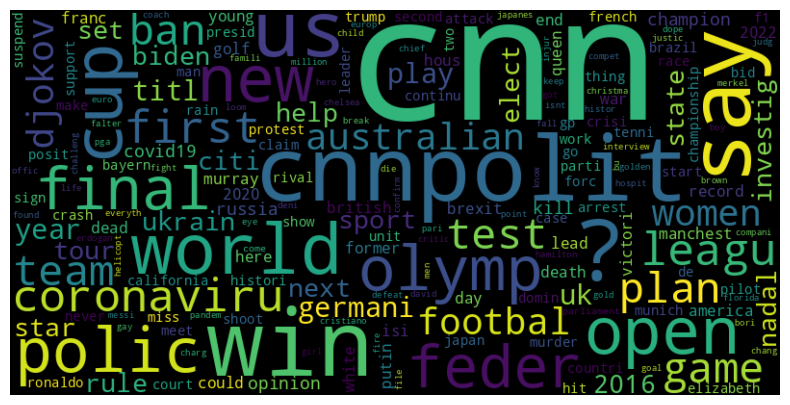

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_headline = bow_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_headline = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_headline)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_headline, interpolation='bilinear')
plt.axis('off')
plt.show()

# Description: Lyushen Song


We perform Bag-of-Words (BoW) and TF-IDF for the Description column.







## BagOfWords

In [34]:
cv_description = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))

cv_description.fit(df["Description"])

#print('number of `tokens`', len(cv_description.vocabulary_))
#cv_description.vocabulary_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e6961120dc0>)

In [35]:
dtm_description = cv_description.transform(df["Description"])
bow_description = pd.DataFrame(dtm_description.toarray(), columns=cv_description.get_feature_names_out())
bow_description

,00,1,10,100,1000,10000,100m,100th,102yearold,10th,...,young,youth,zealand,zelenski,zeliz,zero,zeynab,zidan,zinedin,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bow_description.sum(axis = 0).sort_values(ascending = False)

world       39
year        30
peopl       26
us          26
one         25
            ..
guest        1
guardian     1
guarante     1
growth       1
justin       1
Length: 2850, dtype: int64

## TF-IDF

In [37]:
tfidf_model_description = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))
tfidf_model_description.fit(df["Description"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e69610985e0>)

In [38]:
tfidf_transformed_description = tfidf_model_description.transform(df["Description"])
tfidf_description = pd.DataFrame(tfidf_transformed_description.toarray(), columns = tfidf_model_description.get_feature_names_out())
tfidf_description

,00,1,10,100,1000,10000,100m,100th,102yearold,10th,...,young,youth,zealand,zelenski,zeliz,zero,zeynab,zidan,zinedin,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
tfidf_description.sum(axis = 0).sort_values(ascending = False)

world     5.729036
year      4.690681
us        4.401874
peopl     4.297978
one       4.272124
            ...   
martha    0.156472
guy       0.156472
roam      0.156472
h         0.156472
unnot     0.156472
Length: 2850, dtype: float64

## Word Cloud


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

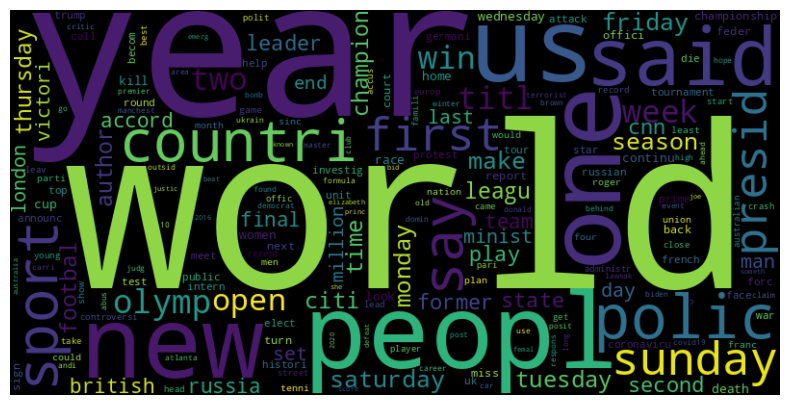

In [40]:
word_freq_description = bow_description.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_description = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_description)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

Conclusion:


World: Since the dataset contains a lot of international news, World appeare the most frequent make sense.

Ukraine, Russia: Because of the war between two countries and it was a top stories in the news for a while and still gathering attention.

Football: 2022 was the year of world cup, therefore, Football were mentioned a lot and also Football is also the most popular sport.

# Second Headline Text - Leonardo Trucios

We perform Bag-of-Words (BoW) and TF-IDF for the Second Headline column.







### BagOfWords

In [41]:
cv_second_headline = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))

cv_second_headline.fit(df["Second headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e6961122f80>)

In [42]:
print('number of `tokens for Second Headline`', len(cv_second_headline.vocabulary_))

number of `tokens for Second Headline` 1776


In [43]:
dtm_2 = cv_second_headline.transform(df["Second headline"])
bow_second_headline = pd.DataFrame(dtm_2.toarray(), columns=cv_second_headline.get_feature_names_out())
bow_second_headline

,!,1,10,10000,103,11,114m,12yearold,13,130,...,ye,year,yet,young,youth,z,zahir,zealand,zero,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
bow_second_headline.sum(axis = 0).sort_values(ascending = False).head()

win      26
say      20
?        20
us       15
world    14
dtype: int64

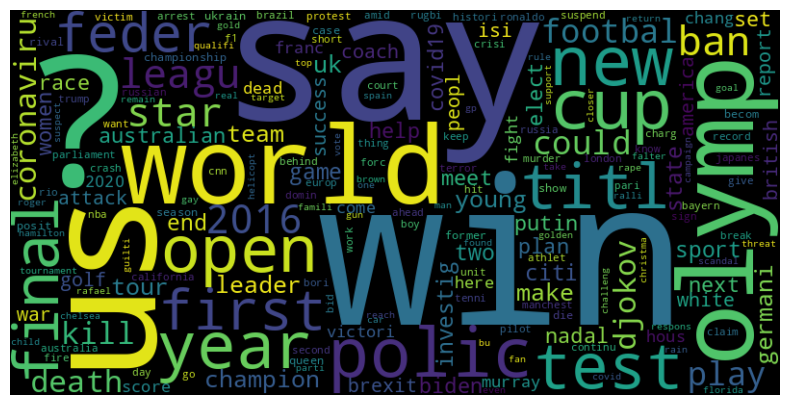

In [45]:
word_freq = bow_second_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion of BoW for Second Headline:** The results indicate the frequency of occurrence for each word in the "Second headline" column after processing with the CountVectorizer. Here's a brief description:

* **"says"**: Appears most frequently, suggesting that many headlines include statements or direct quotes.
* **"new"**: Indicates a significant number of headlines introducing something recent.
* **"world"**: Reflects headlines related to global events or issues.
* **"uk"**: Indicates a focus on news related to the United Kingdom.
* **"cup"**: Could refer to various types of cups, such as sports tournaments or competitions.

### TD-IDF

In [46]:
tfidf_model_second_headline = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))
tfidf_model_second_headline.fit(df["Second headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e6961123be0>)

In [47]:
tfidf_transformed_second_headline = tfidf_model_second_headline.transform(df["Second headline"])
tfidf_second_headline = pd.DataFrame(tfidf_transformed_second_headline.toarray(), columns = tfidf_model_second_headline.get_feature_names_out())
tfidf_second_headline

,!,1,10,10000,103,11,114m,12yearold,13,130,...,ye,year,yet,young,youth,z,zahir,zealand,zero,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
tfidf_second_headline.sum(axis = 0).sort_values(ascending = False).head()

win      5.952802
?        5.281948
say      4.492976
us       3.840899
world    3.512773
dtype: float64

## Word Cloud


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

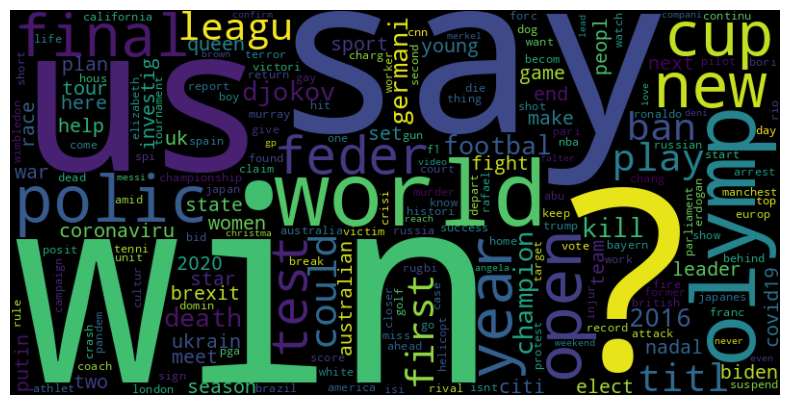

In [49]:
word_freq = tfidf_second_headline.sum(axis = 0).sort_values(ascending = False)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conlusion for the TF-IDF (Term Frequency-Inverse Document Frequency)vectorization technique on the "Second headline":**

* **High Frequency Words**: "says", "world", "new", "uk", and "open" are among the most frequent words, similar to the results obtained from CountVectorizer. These words likely represent common themes or topics in the headlines
* **Less Common Words:** "whitewater", "shoegate", "dier", "manute", and "44th" have lower frequencies and TF-IDF weights. These words might be specific to certain headlines or articles and are less representative of general themes.

# Keywords - Ashley Mercado

We perform Bag-of-Words (BoW) and TF-IDF for the Keywords column.







## BagOfWords

In [50]:
cv_keywords = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))

cv_keywords.fit(df["Keywords"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e69592bb0a0>)

In [51]:
print('number of `tokens`', len(cv_keywords.vocabulary_))

number of `tokens` 1898


In [52]:
dtm = cv_keywords.transform(df["Keywords"])
bow_keywords = pd.DataFrame(dtm.toarray(), columns=cv_keywords.get_feature_names_out())
bow_keywords

,1,10,10000,103,114m,12,13,147,15,1500,...,yemen,york,young,youth,yume,z,zahir,zealand,zero,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
bow_keywords.sum(axis = 0).sort_values(ascending = False)

cnn        361
europ      107
sport       79
footbal     51
us          47
          ... 
lesson       1
leicest      1
legisl       1
legend       1
kayla        1
Length: 1898, dtype: int64

## TF-IDF

In [54]:
tfidf_keywords_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))
tfidf_keywords_model.fit(df["Keywords"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e69592bbbe0>)

In [55]:
tfidf_transformed_keywords = tfidf_keywords_model.transform(df["Keywords"])
tfidf_keywords = pd.DataFrame(tfidf_transformed_keywords.toarray(), columns = tfidf_keywords_model.get_feature_names_out())
tfidf_keywords

,1,10,10000,103,114m,12,13,147,15,1500,...,yemen,york,young,youth,yume,z,zahir,zealand,zero,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
tfidf_keywords.sum(axis = 0).sort_values(ascending = False)

cnn         23.254191
europ       15.802782
sport       11.875099
footbal      9.348300
us           8.781774
              ...    
latin        0.096947
control      0.096947
violent      0.096947
substanc     0.096947
rate         0.096947
Length: 1898, dtype: float64

## Word Cloud


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

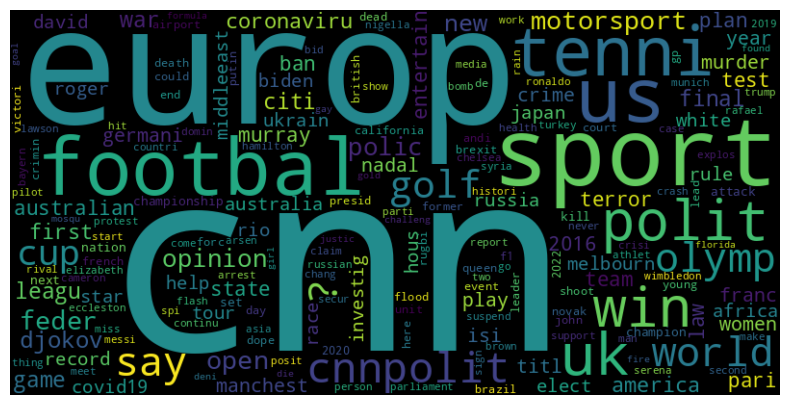

In [57]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_freq = bow_keywords.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

*   High Frequency Words: CNN, Europe, Football, Sport, UK
*   Less Common Words: Karolos, Servants, Deficits, Contraceptive, Hormones

# **Article Text - Pengru Lin**

We perform Bag-of-Words (BoW) and TF-IDF for the Article Text column.







## BagOfWords


In [58]:
cv_artext = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))

cv_artext.fit(df["Article text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e69592b8ca0>)

*Dataset is too big, use random 15% of the original dataset's to verify code*

In [59]:
#df_random_sample = df.sample(frac=0.15, random_state = 42)

In [60]:
dtm_artext = cv_artext.transform(df["Article text"])
bow_artext = pd.DataFrame(dtm_artext.toarray(), columns=cv_artext.get_feature_names_out())
bow_artext

,!,0,00,0010just,002,0020just,0030,0035yet,0036just,0044about,...,zozibini,zu,zubeldia,zuckerberg,zuerlein,zufelt,zurich,zurichit,zverev,zverevreplaymor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
bow_artext.sum(axis = 0).sort_values(ascending = False)

photo              2917
caption            1921
said               1631
best               1124
one                 821
                   ... 
hawar                 1
havoc                 1
havana                1
hava                  1
zverevreplaymor       1
Length: 25849, dtype: int64

## TF-IDF

In [62]:
tfidf_artext_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x))
tfidf_artext_model.fit(df["Article text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e695a6d3be0>)

In [63]:
tfidf_transformed_artext = tfidf_artext_model.transform(df["Article text"])
tfidf_artext = pd.DataFrame(tfidf_transformed_artext.toarray(), columns = tfidf_artext_model.get_feature_names_out())
tfidf_artext

,!,0,00,0010just,002,0020just,0030,0035yet,0036just,0044about,...,zozibini,zu,zubeldia,zuckerberg,zuerlein,zufelt,zurich,zurichit,zverev,zverevreplaymor
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,0.022502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
tfidf_artext.sum(axis = 0).sort_values(ascending = False).head()

said       12.125086
photo       8.920113
caption     7.774223
world       7.350793
year        6.907858
dtype: float64

## Word Cloud

We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

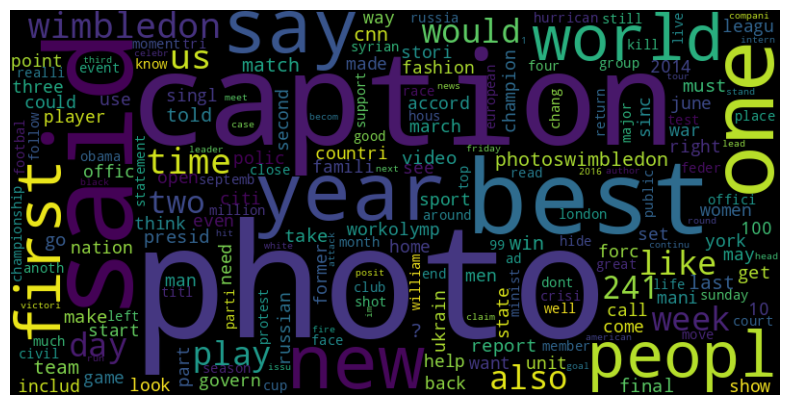

In [65]:
word_freq = bow_artext.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Modeling

## Vector Comparison

## Sentiment Analysis

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

In [67]:
column_list = ["Headline", "Description", "Keywords", "Second headline", "Article text"]

for text in column_list:
    df[f'sentiment_{text}'] = df[text].apply(get_sentiment)

df

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text,sentiment_Headline,sentiment_Description,sentiment_Keywords,sentiment_Second headline,sentiment_Article text
8850,"John Newsome and Ralph Ellis, CNN",2016/12/27,news,us,former texas rangers pitcher john barfield sho...,former texas rangers pitcher john barfield was...,us former texas rangers pitcher john barfield ...,former texas rangers pitcher john barfield sho...,story highlightsthe domestic incident occurred...,0,0,0,0,1
4731,"Laura Smith-Spark, CNN",2018/01/05,news,middleeast,un experts urge iran to respect protesters rig...,un human rights experts urged iranian authorit...,middleeast un experts urge iran to respect pro...,un experts urge iran to respect rights of prot...,cnnun human rights experts urged iranian autho...,1,1,1,1,1
25132,"Dakin Andone and Vasco Cotovio, CNN",2017/12/01,news,europe,prosecutor bosnian croat war criminal had cyan...,the bosnian croat war criminal who died wednes...,europe prosecutor bosnian croat war criminal h...,prosecutor bosnian croat war criminal died of ...,story highlightsslobodan praljak a former croa...,0,1,0,0,1
18330,"Frederik Pleitgen, Steve Almasy and Alla Eshch...",2015/02/27,news,europe,boris nemtsov critic of putin shot dead cnn,russian opposition leader boris nemtsov was ki...,europe boris nemtsov critic of putin shot dead...,boris nemtsov outspoken putin critic shot dead...,story highlights a mourning march will be held...,0,0,0,0,1
13314,Anonymous,2012/07/03,sport,tennis,murray ends marathon match to seal wimbledon l...,andy murray recorded a double triumph on tuesd...,tennis murray ends marathon match to seal wimb...,murray ends marathon match to seal wimbledon l...,story highlightsbritains andy murray books wim...,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,By CNN Staff,2013/05/17,news,europe,france court ruling clears way for gay bill cnn,french court rules that a bill permitting same...,europe france court ruling clears way for gay ...,france court ruling clears way for gay bill,story highlightshollande is expected to sign t...,1,1,1,1,1
34688,"Luke McGee and James Frater, CNN",2021/03/24,news,uk,boris johnsons latest gaffe could threaten bri...,boris johnson the uks gaffeprone prime ministe...,uk boris johnsons latest gaffe could threaten ...,boris johnsons latest gaffe could threaten bri...,london cnnboris johnson the uks gaffeprone pri...,0,1,0,0,1
33080,"Ravi Ubha, for CNN",2020/08/28,sport,sport,nfls baltimore ravens call for arrest of polic...,while several sporting events were scrapped in...,sport nfls baltimore ravens call for arrest of...,nfls baltimore ravens call for arrest of polic...,cnnwhile several sporting events were scrapped...,0,1,0,0,1
31250,"Ravi Ubha and Amanda Davies, CNN",2019/12/20,sport,football,megan rapinoes epic 2019 cnn,megan rapinoes 2019 was much more than just pl...,football megan rapinoes epic 2019 cnn,annus mirabilis megan rapinoes epic 2019,cnnmegan rapinoes 2019 was much more than just...,0,1,0,0,1


In [68]:
df["Average_Sentiment"] = round((df['sentiment_Headline'] + df['sentiment_Description'] + df['sentiment_Keywords'] + df['sentiment_Second headline'] + df['sentiment_Article text']) / 5).astype(int)
df

,Author,Date published,Category,Section,Headline,Description,Keywords,Second headline,Article text,sentiment_Headline,sentiment_Description,sentiment_Keywords,sentiment_Second headline,sentiment_Article text,Average Sentiment
8850,"John Newsome and Ralph Ellis, CNN",2016/12/27,news,us,former texas rangers pitcher john barfield sho...,former texas rangers pitcher john barfield was...,us former texas rangers pitcher john barfield ...,former texas rangers pitcher john barfield sho...,story highlightsthe domestic incident occurred...,0,0,0,0,1,0
4731,"Laura Smith-Spark, CNN",2018/01/05,news,middleeast,un experts urge iran to respect protesters rig...,un human rights experts urged iranian authorit...,middleeast un experts urge iran to respect pro...,un experts urge iran to respect rights of prot...,cnnun human rights experts urged iranian autho...,1,1,1,1,1,1
25132,"Dakin Andone and Vasco Cotovio, CNN",2017/12/01,news,europe,prosecutor bosnian croat war criminal had cyan...,the bosnian croat war criminal who died wednes...,europe prosecutor bosnian croat war criminal h...,prosecutor bosnian croat war criminal died of ...,story highlightsslobodan praljak a former croa...,0,1,0,0,1,0
18330,"Frederik Pleitgen, Steve Almasy and Alla Eshch...",2015/02/27,news,europe,boris nemtsov critic of putin shot dead cnn,russian opposition leader boris nemtsov was ki...,europe boris nemtsov critic of putin shot dead...,boris nemtsov outspoken putin critic shot dead...,story highlights a mourning march will be held...,0,0,0,0,1,0
13314,Anonymous,2012/07/03,sport,tennis,murray ends marathon match to seal wimbledon l...,andy murray recorded a double triumph on tuesd...,tennis murray ends marathon match to seal wimb...,murray ends marathon match to seal wimbledon l...,story highlightsbritains andy murray books wim...,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,By CNN Staff,2013/05/17,news,europe,france court ruling clears way for gay bill cnn,french court rules that a bill permitting same...,europe france court ruling clears way for gay ...,france court ruling clears way for gay bill,story highlightshollande is expected to sign t...,1,1,1,1,1,1
34688,"Luke McGee and James Frater, CNN",2021/03/24,news,uk,boris johnsons latest gaffe could threaten bri...,boris johnson the uks gaffeprone prime ministe...,uk boris johnsons latest gaffe could threaten ...,boris johnsons latest gaffe could threaten bri...,london cnnboris johnson the uks gaffeprone pri...,0,1,0,0,1,0
33080,"Ravi Ubha, for CNN",2020/08/28,sport,sport,nfls baltimore ravens call for arrest of polic...,while several sporting events were scrapped in...,sport nfls baltimore ravens call for arrest of...,nfls baltimore ravens call for arrest of polic...,cnnwhile several sporting events were scrapped...,0,1,0,0,1,0
31250,"Ravi Ubha and Amanda Davies, CNN",2019/12/20,sport,football,megan rapinoes epic 2019 cnn,megan rapinoes 2019 was much more than just pl...,football megan rapinoes epic 2019 cnn,annus mirabilis megan rapinoes epic 2019,cnnmegan rapinoes 2019 was much more than just...,0,1,0,0,1,0


In [69]:
import plotly.express as px

fig = px.histogram(df, x="Average Sentiment")

fig.show()

In [70]:
import plotly.express as px

df_grouped = df.groupby("Date published")["Average_Sentiment"].mean().reset_index()

fig = px.line(df_grouped, x="Date published", y="Average_Sentiment")

fig.show()

## Market Basket Analysis

In [71]:
selected_columns = ["Author", "Category", "Section", "Average Sentiment"]
df_market_basket = df[selected_columns].copy()
df_market_basket

,Author,Category,Section,Average Sentiment
8850,"John Newsome and Ralph Ellis, CNN",news,us,0
4731,"Laura Smith-Spark, CNN",news,middleeast,1
25132,"Dakin Andone and Vasco Cotovio, CNN",news,europe,0
18330,"Frederik Pleitgen, Steve Almasy and Alla Eshch...",news,europe,0
13314,Anonymous,sport,tennis,0
...,...,...,...,...
15305,By CNN Staff,news,europe,1
34688,"Luke McGee and James Frater, CNN",news,uk,0
33080,"Ravi Ubha, for CNN",sport,sport,0
31250,"Ravi Ubha and Amanda Davies, CNN",sport,football,0


In [71]:
# Assuming 'column_name' is the name of the column you want to clean
df_market_basket['column_name'] = df_market_basket['column_name'].str.split('and')

# If you want to explode the column into multiple rows
df_market_basket = df_market_basket.explode('column_name')


In [84]:
analyzer.polarity_scores(df.iloc[1]["Headline"])

{'neg': 0.158, 'neu': 0.583, 'pos': 0.258, 'compound': 0.296}

In [83]:
get_sentiment("I hate you, i want to kill you")

1